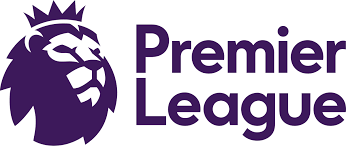
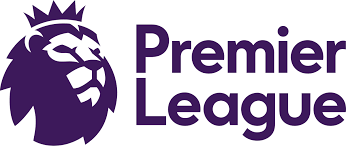
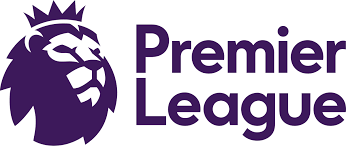
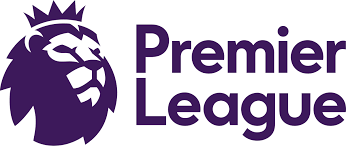
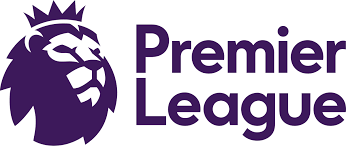
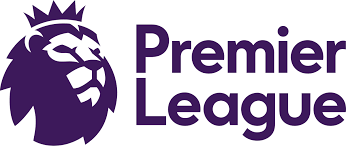



# Features and their abbreviations

Key to results data:

Div = League Division
Date = Match Date (dd/mm/yy)
Time = Time of match kick off
HomeTeam = Home Team
AwayTeam = Away Team
FTHG and HG = Full Time Home Team Goals
FTAG and AG = Full Time Away Team Goals
FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)
HTHG = Half Time Home Team Goals
HTAG = Half Time Away Team Goals
HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)

Match Statistics (where available)
Attendance = Crowd Attendance
Referee = Match Referee
HS = Home Team Shots
AS = Away Team Shots
HST = Home Team Shots on Target
AST = Away Team Shots on Target
HHW = Home Team Hit Woodwork
AHW = Away Team Hit Woodwork
HC = Home Team Corners
AC = Away Team Corners
HF = Home Team Fouls Committed
AF = Away Team Fouls Committed
HFKC = Home Team Free Kicks Conceded
AFKC = Away Team Free Kicks Conceded
HO = Home Team Offsides
AO = Away Team Offsides
HY = Home Team Yellow Cards
AY = Away Team Yellow Cards
HR = Home Team Red Cards
AR = Away Team Red Cards
HBP = Home Team Bookings Points (10 = yellow, 25 = red)
ABP = Away Team Bookings Points (10 = yellow, 25 = red)

Note that Free Kicks Conceeded includes fouls, offsides and any other offense commmitted and will always be equal to or higher than the number of fouls. Fouls make up the vast majority of Free Kicks Conceded. Free Kicks Conceded are shown when specific data on Fouls are not available (France 2nd, Belgium 1st and Greece 1st divisions).

Note also that English and Scottish yellow cards do not include the initial yellow card when a second is shown to a player converting it into a red, but this is included as a yellow (plus red) for European games.


[Pre-closing odds. For closing odds, see further below.]

Key to 1X2 (match) betting odds data: 

B365H = Bet365 home win odds
B365D = Bet365 draw odds

# Importing essential libraries

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier


# Importing dataset

In [5]:
df=pd.read_csv('/Users/aminarbab/Desktop/2023-2024.csv')

# dropping most of betting odds
**except bet365**

In [7]:
# List of columns to drop based on suggestions
columns_to_drop = [
    'BFH', 'BFD', 'BFA', 'BSH', 'BSD', 'BSA', 'BWH', 'BWD', 'BWA', 
    'GBH', 'GBD', 'GBA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 
    'PSH', 'PSD', 'PSA', 'SOH', 'SOD', 'SOA', 'SBH', 'SBD', 'SBA', 
    'SJH', 'SJD', 'SJA', 'SYH', 'SYD', 'SYA', 'VCH', 'VCD', 'VCA', 
    'WHH', 'WHD', 'WHA',
    'GB>2.5', 'GB<2.5', 'B365>2.5', 'B365<2.5',
    'GBAHH', 'GBAHA', 'GBAH', 'LBAHH', 'LBAHA', 'LBAH', 
    'B365AHH', 'B365AHA', 'B365AH', 'PAHH', 'PAHA'
]

# Drop the specified columns
df = df.drop(columns=columns_to_drop, errors='ignore')

# Check the remaining columns
print(df.columns)


Index(['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF',
       'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'MaxH',
       'MaxD', 'MaxA', 'AvgH', 'AvgD', 'AvgA', 'P>2.5', 'P<2.5', 'Max>2.5',
       'Max<2.5', 'Avg>2.5', 'Avg<2.5', 'AHh', 'MaxAHH', 'MaxAHA', 'AvgAHH',
       'AvgAHA', 'B365CH', 'B365CD', 'B365CA', 'BWCH', 'BWCD', 'BWCA', 'IWCH',
       'IWCD', 'IWCA', 'PSCH', 'PSCD', 'PSCA', 'WHCH', 'WHCD', 'WHCA', 'VCCH',
       'VCCD', 'VCCA', 'MaxCH', 'MaxCD', 'MaxCA', 'AvgCH', 'AvgCD', 'AvgCA',
       'B365C>2.5', 'B365C<2.5', 'PC>2.5', 'PC<2.5', 'MaxC>2.5', 'MaxC<2.5',
       'AvgC>2.5', 'AvgC<2.5', 'AHCh', 'B365CAHH', 'B365CAHA', 'PCAHH',
       'PCAHA', 'MaxCAHH', 'MaxCAHA', 'AvgCAHH', 'AvgCAHA'],
      dtype='object')


# taking a look at our DataFrame

In [9]:
df

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,11/08/2023,20:00,Burnley,Man City,0,3,A,0,2,...,2.28,1.50,1.95,1.98,1.95,1.97,NaN,NaN,1.92,1.95
1,E0,12/08/2023,12:30,Arsenal,Nott'm Forest,2,1,H,2,0,...,2.63,-2.00,1.95,1.98,1.93,1.97,2.01,2.09,1.95,1.92
2,E0,12/08/2023,15:00,Bournemouth,West Ham,1,1,D,0,0,...,2.12,0.00,2.02,1.91,2.01,1.92,2.06,1.96,1.96,1.91
3,E0,12/08/2023,15:00,Brighton,Luton,4,1,H,1,0,...,2.48,-1.75,2.01,1.92,2.00,1.91,2.14,1.93,2.00,1.86
4,E0,12/08/2023,15:00,Everton,Fulham,0,1,A,0,0,...,1.71,-0.25,2.06,1.87,2.04,1.88,2.08,1.99,1.98,1.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,E0,19/05/2024,16:00,Crystal Palace,Aston Villa,5,0,H,2,0,...,2.78,-0.75,1.73,2.08,1.78,2.16,1.93,2.21,1.81,2.05
376,E0,19/05/2024,16:00,Liverpool,Wolves,2,0,H,2,0,...,5.17,-2.75,2.07,1.86,2.04,1.85,2.10,1.89,2.04,1.82
377,E0,19/05/2024,16:00,Luton,Fulham,2,4,A,1,2,...,2.69,0.25,2.00,1.93,1.99,1.93,2.02,1.94,1.96,1.91
378,E0,19/05/2024,16:00,Man City,West Ham,3,1,H,2,1,...,4.82,-3.00,2.03,1.90,1.99,1.90,2.05,1.99,1.96,1.91


# Display the column names of the DataFrame

In [11]:
print(df.columns.tolist())


['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD', 'AvgA', 'P>2.5', 'P<2.5', 'Max>2.5', 'Max<2.5', 'Avg>2.5', 'Avg<2.5', 'AHh', 'MaxAHH', 'MaxAHA', 'AvgAHH', 'AvgAHA', 'B365CH', 'B365CD', 'B365CA', 'BWCH', 'BWCD', 'BWCA', 'IWCH', 'IWCD', 'IWCA', 'PSCH', 'PSCD', 'PSCA', 'WHCH', 'WHCD', 'WHCA', 'VCCH', 'VCCD', 'VCCA', 'MaxCH', 'MaxCD', 'MaxCA', 'AvgCH', 'AvgCD', 'AvgCA', 'B365C>2.5', 'B365C<2.5', 'PC>2.5', 'PC<2.5', 'MaxC>2.5', 'MaxC<2.5', 'AvgC>2.5', 'AvgC<2.5', 'AHCh', 'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA', 'MaxCAHH', 'MaxCAHA', 'AvgCAHH', 'AvgCAHA']


# keeping the needed columns

In [13]:
import pandas as pd


# Columns available in your dataset
available_columns = [
    'Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam',
    'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR',
    'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF',
    'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A'
]

# Columns you want to keep
desired_columns = [
    'Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam',
    'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR',
    'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF',
    'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A'
]

# Filter to keep only columns present in your DataFrame
columns_to_keep = [col for col in desired_columns if col in available_columns]

# Keep only the specified columns
df = df[columns_to_keep]

# Check the resulting DataFrame
print(df.head())

  Div        Date   Time     HomeTeam       AwayTeam  FTHG  FTAG FTR  HTHG  \
0  E0  11/08/2023  20:00      Burnley       Man City     0     3   A     0   
1  E0  12/08/2023  12:30      Arsenal  Nott'm Forest     2     1   H     2   
2  E0  12/08/2023  15:00  Bournemouth       West Ham     1     1   D     0   
3  E0  12/08/2023  15:00     Brighton          Luton     4     1   H     1   
4  E0  12/08/2023  15:00      Everton         Fulham     0     1   A     0   

   HTAG  ...  AF  HC  AC  HY  AY  HR  AR  B365H  B365D  B365A  
0     2  ...   8   6   5   0   0   1   0   8.00    5.5   1.33  
1     0  ...  12   8   3   2   2   0   0   1.18    7.0  15.00  
2     0  ...  14  10   4   1   4   0   0   2.70    3.4   2.55  
3     0  ...  12   6   7   2   2   0   0   1.33    5.5   9.00  
4     0  ...   6  10   4   0   2   0   0   2.20    3.4   3.30  

[5 rows x 27 columns]


In [15]:
df

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A
0,E0,11/08/2023,20:00,Burnley,Man City,0,3,A,0,2,...,8,6,5,0,0,1,0,8.00,5.50,1.33
1,E0,12/08/2023,12:30,Arsenal,Nott'm Forest,2,1,H,2,0,...,12,8,3,2,2,0,0,1.18,7.00,15.00
2,E0,12/08/2023,15:00,Bournemouth,West Ham,1,1,D,0,0,...,14,10,4,1,4,0,0,2.70,3.40,2.55
3,E0,12/08/2023,15:00,Brighton,Luton,4,1,H,1,0,...,12,6,7,2,2,0,0,1.33,5.50,9.00
4,E0,12/08/2023,15:00,Everton,Fulham,0,1,A,0,0,...,6,10,4,0,2,0,0,2.20,3.40,3.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,E0,19/05/2024,16:00,Crystal Palace,Aston Villa,5,0,H,2,0,...,8,2,4,1,4,0,0,1.85,4.33,3.60
376,E0,19/05/2024,16:00,Liverpool,Wolves,2,0,H,2,0,...,11,10,2,1,1,0,1,1.17,8.00,15.00
377,E0,19/05/2024,16:00,Luton,Fulham,2,4,A,1,2,...,20,4,4,5,4,0,0,2.90,3.90,2.20
378,E0,19/05/2024,16:00,Man City,West Ham,3,1,H,2,1,...,12,11,2,0,1,0,0,1.08,12.00,21.00


# Using IQR for detecting outliers per feature

In [17]:
import pandas as pd


def find_outliers_iqr(df):
    outliers = {}
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Find outliers
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]

    return outliers

# Find outliers
outliers = find_outliers_iqr(df)

# Display outliers for each column
for column, outliers_data in outliers.items():
    print(f"Outliers in {column}:")
    print(outliers_data)
    print()

Outliers in FTHG:
Series([], Name: FTHG, dtype: int64)

Outliers in FTAG:
13     4
32     5
58     8
60     4
71     4
109    4
119    4
141    4
183    4
206    4
217    4
221    4
222    5
224    4
235    6
238    4
239    5
245    5
267    6
273    4
303    4
323    5
324    4
335    4
350    4
357    4
371    4
377    4
Name: FTAG, dtype: int64

Outliers in HTHG:
59     3
84     3
104    3
157    3
210    3
219    3
250    3
294    3
322    4
328    4
352    3
354    3
Name: HTHG, dtype: int64

Outliers in HTAG:
58     3
183    3
222    4
235    4
267    5
278    3
335    3
344    3
350    3
371    3
Name: HTAG, dtype: int64

Outliers in HS:
168    34
196    34
269    32
285    33
316    33
376    36
Name: HS, dtype: int64

Outliers in AS:
27     30
44     29
200    27
310    28
336    28
Name: AS, dtype: int64

Outliers in HST:
196    15
354    14
376    14
Name: HST, dtype: int64

Outliers in AST:
44     15
58     15
125    11
200    11
227    15
235    12
350    11
Name: AST, dt

# looking for missing data values

In [19]:
import pandas as pd


def check_missing_data(df):
    # Find the count of missing values for each column
    missing_data = df.isnull().sum()

    # Filter columns with missing values
    missing_data = missing_data[missing_data > 0]

    return missing_data

# Check for missing data
missing_values = check_missing_data(df)

# Display columns with missing data and their counts
if not missing_values.empty:
    print("Columns with missing values:")
    print(missing_values)
else:
    print("No missing values found.")

No missing values found.


# Formatting the date feature

In [21]:
import pandas as pd

# Convert 'Date' to datetime format with dayfirst=True
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Sort the DataFrame by date
df = df.sort_values(by='Date')

# Initialize columns for storing days since last match for each team
df['Home_Days_Since_Last_Match'] = 0
df['Away_Days_Since_Last_Match'] = 0

# Create dictionaries to store the last match date for each team
last_match_date_home = {}
last_match_date_away = {}

# Iterate over each row to calculate days since last match
for index, row in df.iterrows():
    home_team = row['HomeTeam']
    away_team = row['AwayTeam']
    current_date = row['Date']
    
    # Calculate days since last match for home team
    if home_team in last_match_date_home:
        df.at[index, 'Home_Days_Since_Last_Match'] = (current_date - last_match_date_home[home_team]).days
    last_match_date_home[home_team] = current_date
    
    # Calculate days since last match for away team
    if away_team in last_match_date_away:
        df.at[index, 'Away_Days_Since_Last_Match'] = (current_date - last_match_date_away[away_team]).days
    last_match_date_away[away_team] = current_date

# Display the new columns
selected_columns = ['Date', 'HomeTeam', 'AwayTeam', 'Home_Days_Since_Last_Match', 'Away_Days_Since_Last_Match']
print(df[selected_columns])


          Date          HomeTeam       AwayTeam  Home_Days_Since_Last_Match  \
0   2023-08-11           Burnley       Man City                           0   
1   2023-08-12           Arsenal  Nott'm Forest                           0   
2   2023-08-12       Bournemouth       West Ham                           0   
3   2023-08-12          Brighton          Luton                           0   
4   2023-08-12           Everton         Fulham                           0   
..         ...               ...            ...                         ...   
372 2024-05-19          Brighton     Man United                           4   
371 2024-05-19         Brentford      Newcastle                          15   
370 2024-05-19           Arsenal        Everton                          15   
373 2024-05-19           Burnley  Nott'm Forest                          15   
379 2024-05-19  Sheffield United      Tottenham                          15   

     Away_Days_Since_Last_Match  
0                

/var/folders/5q/c6yl99896xvf_vngl1s8h4qw0000gn/T/ipykernel_53629/1050930491.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)


In [23]:
df

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AC,HY,AY,HR,AR,B365H,B365D,B365A,Home_Days_Since_Last_Match,Away_Days_Since_Last_Match
0,E0,2023-08-11,20:00,Burnley,Man City,0,3,A,0,2,...,5,0,0,1,0,8.00,5.5,1.33,0,0
1,E0,2023-08-12,12:30,Arsenal,Nott'm Forest,2,1,H,2,0,...,3,2,2,0,0,1.18,7.0,15.00,0,0
2,E0,2023-08-12,15:00,Bournemouth,West Ham,1,1,D,0,0,...,4,1,4,0,0,2.70,3.4,2.55,0,0
3,E0,2023-08-12,15:00,Brighton,Luton,4,1,H,1,0,...,7,2,2,0,0,1.33,5.5,9.00,0,0
4,E0,2023-08-12,15:00,Everton,Fulham,0,1,A,0,0,...,4,0,2,0,0,2.20,3.4,3.30,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,E0,2024-05-19,16:00,Brighton,Man United,0,2,A,0,0,...,5,1,3,0,0,2.15,4.0,2.90,4,13
371,E0,2024-05-19,16:00,Brentford,Newcastle,2,4,A,0,3,...,0,4,4,0,0,2.90,3.9,2.20,15,4
370,E0,2024-05-19,16:00,Arsenal,Everton,2,1,H,1,1,...,1,4,3,0,0,1.18,8.0,12.00,15,16
373,E0,2024-05-19,16:00,Burnley,Nott'm Forest,1,2,A,0,2,...,3,1,0,0,0,3.00,3.5,2.30,15,15


# Encoding the HomeTeam and AwayTeam features

In [25]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder



# Initialize the label encoder
label_encoder = LabelEncoder()

# Encode the 'HomeTeam' and 'AwayTeam' columns
df['HomeTeam_encoded'] = label_encoder.fit_transform(df['HomeTeam'])
df['AwayTeam_encoded'] = label_encoder.fit_transform(df['AwayTeam'])

# Drop the old columns
df = df.drop(columns=['HomeTeam', 'AwayTeam'])

# Display the updated DataFrame
print(df.head())


  Div       Date   Time  FTHG  FTAG FTR  HTHG  HTAG HTR    Referee  ...  AY  \
0  E0 2023-08-11  20:00     0     3   A     0     2   A   C Pawson  ...   0   
1  E0 2023-08-12  12:30     2     1   H     2     0   H   M Oliver  ...   2   
2  E0 2023-08-12  15:00     1     1   D     0     0   D   P Bankes  ...   4   
3  E0 2023-08-12  15:00     4     1   H     1     0   H    D Coote  ...   2   
4  E0 2023-08-12  15:00     0     1   A     0     0   D  S Attwell  ...   2   

   HR  AR  B365H  B365D  B365A  Home_Days_Since_Last_Match  \
0   1   0   8.00    5.5   1.33                           0   
1   0   0   1.18    7.0  15.00                           0   
2   0   0   2.70    3.4   2.55                           0   
3   0   0   1.33    5.5   9.00                           0   
4   0   0   2.20    3.4   3.30                           0   

   Away_Days_Since_Last_Match  HomeTeam_encoded  AwayTeam_encoded  
0                           0                 5                12  
1               

In [27]:
df

,Div,Date,Time,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,AY,HR,AR,B365H,B365D,B365A,Home_Days_Since_Last_Match,Away_Days_Since_Last_Match,HomeTeam_encoded,AwayTeam_encoded
0,E0,2023-08-11,20:00,0,3,A,0,2,A,C Pawson,...,0,1,0,8.00,5.5,1.33,0,0,5,12
1,E0,2023-08-12,12:30,2,1,H,2,0,H,M Oliver,...,2,0,0,1.18,7.0,15.00,0,0,0,15
2,E0,2023-08-12,15:00,1,1,D,0,0,D,P Bankes,...,4,0,0,2.70,3.4,2.55,0,0,2,18
3,E0,2023-08-12,15:00,4,1,H,1,0,H,D Coote,...,2,0,0,1.33,5.5,9.00,0,0,4,11
4,E0,2023-08-12,15:00,0,1,A,0,0,D,S Attwell,...,2,0,0,2.20,3.4,3.30,0,0,8,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,E0,2024-05-19,16:00,0,2,A,0,0,D,C Pawson,...,3,0,0,2.15,4.0,2.90,4,13,4,13
371,E0,2024-05-19,16:00,2,4,A,0,3,A,S Hooper,...,4,0,0,2.90,3.9,2.20,15,4,3,14
370,E0,2024-05-19,16:00,2,1,H,1,1,D,M Oliver,...,3,0,0,1.18,8.0,12.00,15,16,0,8
373,E0,2024-05-19,16:00,1,2,A,0,2,A,G Scott,...,0,0,0,3.00,3.5,2.30,15,15,5,15


# Encoding the referee feature

In [29]:
import pandas as pd


# Label encode the "Referee" column
df['Referee_encoded'] = df['Referee'].astype('category').cat.codes

# Drop the original "Referee" column
df.drop('Referee', axis=1, inplace=True)

# Display the DataFrame to verify
print(df.head())

  Div       Date   Time  FTHG  FTAG FTR  HTHG  HTAG HTR  HS  ...  HR  AR  \
0  E0 2023-08-11  20:00     0     3   A     0     2   A   6  ...   1   0   
1  E0 2023-08-12  12:30     2     1   H     2     0   H  15  ...   0   0   
2  E0 2023-08-12  15:00     1     1   D     0     0   D  14  ...   0   0   
3  E0 2023-08-12  15:00     4     1   H     1     0   H  27  ...   0   0   
4  E0 2023-08-12  15:00     0     1   A     0     0   D  19  ...   0   0   

   B365H  B365D  B365A  Home_Days_Since_Last_Match  \
0   8.00    5.5   1.33                           0   
1   1.18    7.0  15.00                           0   
2   2.70    3.4   2.55                           0   
3   1.33    5.5   9.00                           0   
4   2.20    3.4   3.30                           0   

   Away_Days_Since_Last_Match  HomeTeam_encoded  AwayTeam_encoded  \
0                           0                 5                12   
1                           0                 0                15   
2          

In [31]:
df

,Div,Date,Time,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,HR,AR,B365H,B365D,B365A,Home_Days_Since_Last_Match,Away_Days_Since_Last_Match,HomeTeam_encoded,AwayTeam_encoded,Referee_encoded
0,E0,2023-08-11,20:00,0,3,A,0,2,A,6,...,1,0,8.00,5.5,1.33,0,0,5,12,3
1,E0,2023-08-12,12:30,2,1,H,2,0,H,15,...,0,0,1.18,7.0,15.00,0,0,0,15,14
2,E0,2023-08-12,15:00,1,1,D,0,0,D,14,...,0,0,2.70,3.4,2.55,0,0,2,18,16
3,E0,2023-08-12,15:00,4,1,H,1,0,H,27,...,0,0,1.33,5.5,9.00,0,0,4,11,5
4,E0,2023-08-12,15:00,0,1,A,0,0,D,19,...,0,0,2.20,3.4,3.30,0,0,8,9,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,E0,2024-05-19,16:00,0,2,A,0,0,D,17,...,0,0,2.15,4.0,2.90,4,13,4,13,3
371,E0,2024-05-19,16:00,2,4,A,0,3,A,10,...,0,0,2.90,3.9,2.20,15,4,3,14,24
370,E0,2024-05-19,16:00,2,1,H,1,1,D,26,...,0,0,1.18,8.0,12.00,15,16,0,8,14
373,E0,2024-05-19,16:00,1,2,A,0,2,A,20,...,0,0,3.00,3.5,2.30,15,15,5,15,7


# dropping the 2 features

In [33]:
import pandas as pd


# Drop the "Div" column
df.drop('Div', axis=1, inplace=True)

# Display the DataFrame to verify the column has been removed
print(df.head())



        Date   Time  FTHG  FTAG FTR  HTHG  HTAG HTR  HS  AS  ...  HR  AR  \
0 2023-08-11  20:00     0     3   A     0     2   A   6  17  ...   1   0   
1 2023-08-12  12:30     2     1   H     2     0   H  15   6  ...   0   0   
2 2023-08-12  15:00     1     1   D     0     0   D  14  16  ...   0   0   
3 2023-08-12  15:00     4     1   H     1     0   H  27   9  ...   0   0   
4 2023-08-12  15:00     0     1   A     0     0   D  19   9  ...   0   0   

   B365H  B365D  B365A  Home_Days_Since_Last_Match  \
0   8.00    5.5   1.33                           0   
1   1.18    7.0  15.00                           0   
2   2.70    3.4   2.55                           0   
3   1.33    5.5   9.00                           0   
4   2.20    3.4   3.30                           0   

   Away_Days_Since_Last_Match  HomeTeam_encoded  AwayTeam_encoded  \
0                           0                 5                12   
1                           0                 0                15   
2          

In [35]:
df

,Date,Time,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,...,HR,AR,B365H,B365D,B365A,Home_Days_Since_Last_Match,Away_Days_Since_Last_Match,HomeTeam_encoded,AwayTeam_encoded,Referee_encoded
0,2023-08-11,20:00,0,3,A,0,2,A,6,17,...,1,0,8.00,5.5,1.33,0,0,5,12,3
1,2023-08-12,12:30,2,1,H,2,0,H,15,6,...,0,0,1.18,7.0,15.00,0,0,0,15,14
2,2023-08-12,15:00,1,1,D,0,0,D,14,16,...,0,0,2.70,3.4,2.55,0,0,2,18,16
3,2023-08-12,15:00,4,1,H,1,0,H,27,9,...,0,0,1.33,5.5,9.00,0,0,4,11,5
4,2023-08-12,15:00,0,1,A,0,0,D,19,9,...,0,0,2.20,3.4,3.30,0,0,8,9,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,2024-05-19,16:00,0,2,A,0,0,D,17,11,...,0,0,2.15,4.0,2.90,4,13,4,13,3
371,2024-05-19,16:00,2,4,A,0,3,A,10,12,...,0,0,2.90,3.9,2.20,15,4,3,14,24
370,2024-05-19,16:00,2,1,H,1,1,D,26,5,...,0,0,1.18,8.0,12.00,15,16,0,8,14
373,2024-05-19,16:00,1,2,A,0,2,A,20,12,...,0,0,3.00,3.5,2.30,15,15,5,15,7


# Number of times each team won the first half and full match

In [37]:
df['HTR_WinningTeam'] = df.apply(
    lambda row: row['HomeTeam_encoded'] if row['HTHG'] > row['HTAG'] else (
        row['AwayTeam_encoded'] if row['HTHG'] < row['HTAG'] else 'Draw'), axis=1)

df['FTR_WinningTeam'] = df.apply(
    lambda row: row['HomeTeam_encoded'] if row['FTHG'] > row['FTAG'] else (
        row['AwayTeam_encoded'] if row['FTHG'] < row['FTAG'] else 'Draw'), axis=1)

# To get the counts of teams that won the first half or the match
ht_half_winners = df['HTR_WinningTeam'].value_counts()
ft_full_winners = df['FTR_WinningTeam'].value_counts()

# Output the results
print("Number of times each team won the first half:")
print(ht_half_winners)

print("\nNumber of times each team won the full match:")
print(ft_full_winners)

Number of times each team won the first half:
HTR_WinningTeam
Draw    153
12       21
0        18
1        16
10       14
6        14
18       13
14       13
4        12
7        12
17       11
19       10
13       10
2        10
9         9
11        9
3         8
5         8
8         8
15        7
16        4
Name: count, dtype: int64

Number of times each team won the full match:
FTR_WinningTeam
Draw    82
12      28
0       28
10      24
1       20
17      20
14      18
13      18
6       18
18      14
2       13
8       13
19      13
9       13
7       13
4       12
3       10
15       9
11       6
5        5
16       3
Name: count, dtype: int64


In [39]:
df

,Date,Time,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,...,B365H,B365D,B365A,Home_Days_Since_Last_Match,Away_Days_Since_Last_Match,HomeTeam_encoded,AwayTeam_encoded,Referee_encoded,HTR_WinningTeam,FTR_WinningTeam
0,2023-08-11,20:00,0,3,A,0,2,A,6,17,...,8.00,5.5,1.33,0,0,5,12,3,12,12
1,2023-08-12,12:30,2,1,H,2,0,H,15,6,...,1.18,7.0,15.00,0,0,0,15,14,0,0
2,2023-08-12,15:00,1,1,D,0,0,D,14,16,...,2.70,3.4,2.55,0,0,2,18,16,Draw,Draw
3,2023-08-12,15:00,4,1,H,1,0,H,27,9,...,1.33,5.5,9.00,0,0,4,11,5,4,4
4,2023-08-12,15:00,0,1,A,0,0,D,19,9,...,2.20,3.4,3.30,0,0,8,9,22,Draw,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,2024-05-19,16:00,0,2,A,0,0,D,17,11,...,2.15,4.0,2.90,4,13,4,13,3,Draw,13
371,2024-05-19,16:00,2,4,A,0,3,A,10,12,...,2.90,3.9,2.20,15,4,3,14,24,14,14
370,2024-05-19,16:00,2,1,H,1,1,D,26,5,...,1.18,8.0,12.00,15,16,0,8,14,Draw,0
373,2024-05-19,16:00,1,2,A,0,2,A,20,12,...,3.00,3.5,2.30,15,15,5,15,7,15,15


In [41]:
# Assuming your DataFrame has the following columns:
# 'HomeTeam_encoded', 'AwayTeam_encoded', 'HTHG', 'HTAG', 'FTHG', 'FTAG'

# Use 0 to represent a draw
df['HTR_WinningTeam'] = df.apply(
    lambda row: row['HomeTeam_encoded'] if row['HTHG'] > row['HTAG'] else (
        row['AwayTeam_encoded'] if row['HTHG'] < row['HTAG'] else 0), axis=1)

df['FTR_WinningTeam'] = df.apply(
    lambda row: row['HomeTeam_encoded'] if row['FTHG'] > row['FTAG'] else (
        row['AwayTeam_encoded'] if row['FTHG'] < row['FTAG'] else 0), axis=1)

# To get the counts of teams that won the first half or the match
ht_half_winners = df['HTR_WinningTeam'].value_counts()
ft_full_winners = df['FTR_WinningTeam'].value_counts()

# Output the results
print("Number of times each team won the first half:")
print(ht_half_winners)

print("\nNumber of times each team won the full match:")
print(ft_full_winners)


Number of times each team won the first half:
HTR_WinningTeam
0     171
12     21
1      16
10     14
6      14
14     13
18     13
4      12
7      12
17     11
19     10
13     10
2      10
11      9
9       9
5       8
3       8
8       8
15      7
16      4
Name: count, dtype: int64

Number of times each team won the full match:
FTR_WinningTeam
0     110
12     28
10     24
1      20
17     20
14     18
13     18
6      18
18     14
7      13
9      13
19     13
8      13
2      13
4      12
3      10
15      9
11      6
5       5
16      3
Name: count, dtype: int64


In [43]:
df

,Date,Time,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,...,B365H,B365D,B365A,Home_Days_Since_Last_Match,Away_Days_Since_Last_Match,HomeTeam_encoded,AwayTeam_encoded,Referee_encoded,HTR_WinningTeam,FTR_WinningTeam
0,2023-08-11,20:00,0,3,A,0,2,A,6,17,...,8.00,5.5,1.33,0,0,5,12,3,12,12
1,2023-08-12,12:30,2,1,H,2,0,H,15,6,...,1.18,7.0,15.00,0,0,0,15,14,0,0
2,2023-08-12,15:00,1,1,D,0,0,D,14,16,...,2.70,3.4,2.55,0,0,2,18,16,0,0
3,2023-08-12,15:00,4,1,H,1,0,H,27,9,...,1.33,5.5,9.00,0,0,4,11,5,4,4
4,2023-08-12,15:00,0,1,A,0,0,D,19,9,...,2.20,3.4,3.30,0,0,8,9,22,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,2024-05-19,16:00,0,2,A,0,0,D,17,11,...,2.15,4.0,2.90,4,13,4,13,3,0,13
371,2024-05-19,16:00,2,4,A,0,3,A,10,12,...,2.90,3.9,2.20,15,4,3,14,24,14,14
370,2024-05-19,16:00,2,1,H,1,1,D,26,5,...,1.18,8.0,12.00,15,16,0,8,14,0,0
373,2024-05-19,16:00,1,2,A,0,2,A,20,12,...,3.00,3.5,2.30,15,15,5,15,7,15,15


In [45]:
# Display the column names before dropping
print("Columns before dropping:", df.columns)

# Drop the 'HTR_WinningTeam' column from the dataset
df.drop(columns=['HTR_WinningTeam'], inplace=True)

# Display the column names after dropping
print("Columns after dropping:", df.columns)



Columns before dropping: Index(['Date', 'Time', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'HS',
       'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR',
       'B365H', 'B365D', 'B365A', 'Home_Days_Since_Last_Match',
       'Away_Days_Since_Last_Match', 'HomeTeam_encoded', 'AwayTeam_encoded',
       'Referee_encoded', 'HTR_WinningTeam', 'FTR_WinningTeam'],
      dtype='object')
Columns after dropping: Index(['Date', 'Time', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'HS',
       'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR',
       'B365H', 'B365D', 'B365A', 'Home_Days_Since_Last_Match',
       'Away_Days_Since_Last_Match', 'HomeTeam_encoded', 'AwayTeam_encoded',
       'Referee_encoded', 'FTR_WinningTeam'],
      dtype='object')


# dropping 4 columns

In [47]:
# Remove the specified columns
columns_to_drop = ['Time', 'Date', 'HTR', 'FTR']
df = df.drop(columns=columns_to_drop)

# Check the resulting DataFrame
print(df.head())


   FTHG  FTAG  HTHG  HTAG  HS  AS  HST  AST  HF  AF  ...  AR  B365H  B365D  \
0     0     3     0     2   6  17    1    8  11   8  ...   0   8.00    5.5   
1     2     1     2     0  15   6    7    2  12  12  ...   0   1.18    7.0   
2     1     1     0     0  14  16    5    3   9  14  ...   0   2.70    3.4   
3     4     1     1     0  27   9   12    3  11  12  ...   0   1.33    5.5   
4     0     1     0     0  19   9    9    2  12   6  ...   0   2.20    3.4   

   B365A  Home_Days_Since_Last_Match  Away_Days_Since_Last_Match  \
0   1.33                           0                           0   
1  15.00                           0                           0   
2   2.55                           0                           0   
3   9.00                           0                           0   
4   3.30                           0                           0   

   HomeTeam_encoded  AwayTeam_encoded  Referee_encoded  FTR_WinningTeam  
0                 5                12           

# Visualization

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


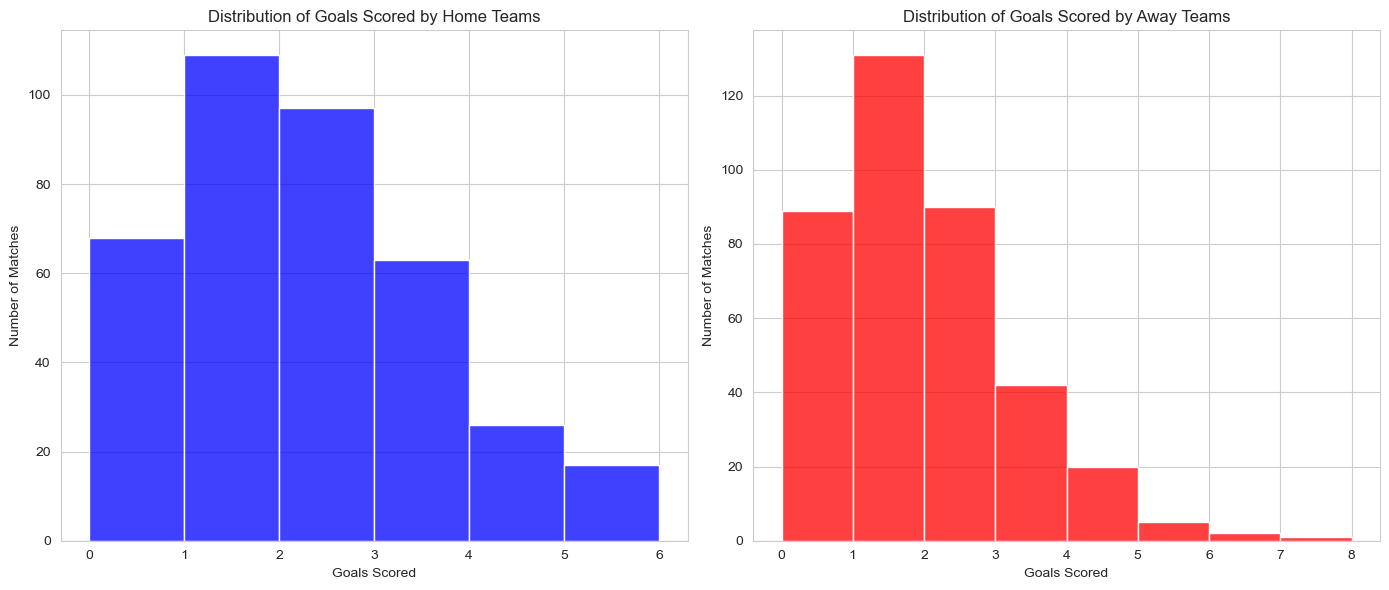

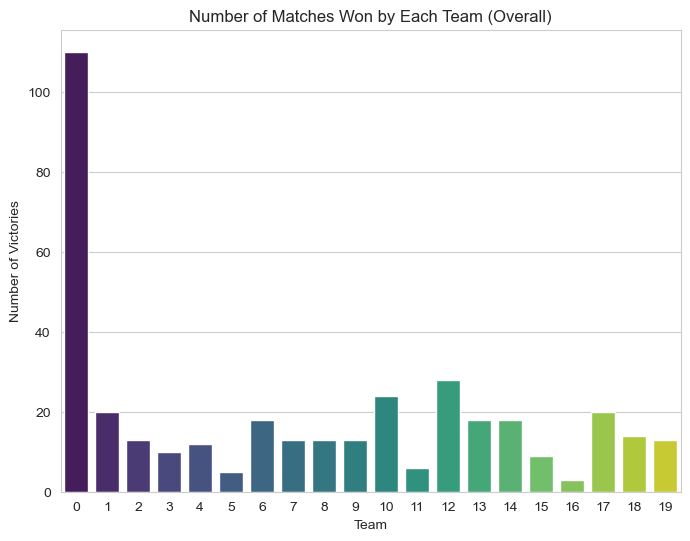

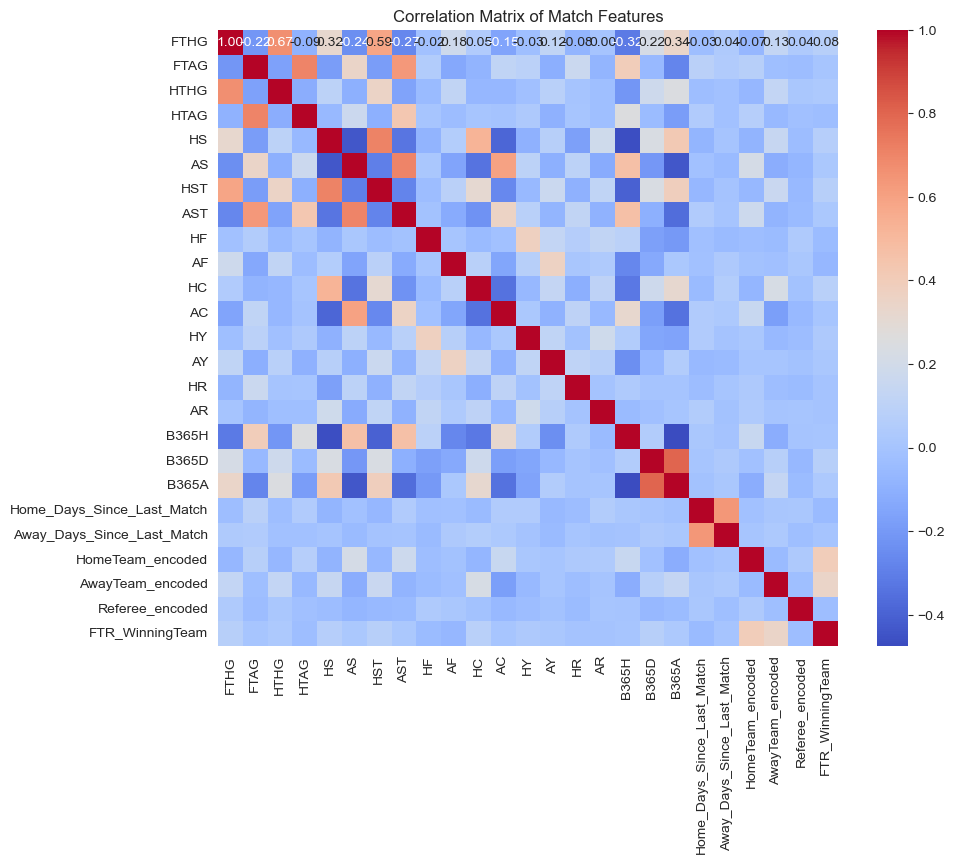

In [49]:
# Set the style of seaborn plots
sns.set_style('whitegrid')

# 1. Distribution of goals scored by home and away teams
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['FTHG'], bins=range(0, df['FTHG'].max()+1), kde=False, color='blue')
plt.title('Distribution of Goals Scored by Home Teams')
plt.xlabel('Goals Scored')
plt.ylabel('Number of Matches')

plt.subplot(1, 2, 2)
sns.histplot(df['FTAG'], bins=range(0, df['FTAG'].max()+1), kde=False, color='red')
plt.title('Distribution of Goals Scored by Away Teams')
plt.xlabel('Goals Scored')
plt.ylabel('Number of Matches')

plt.tight_layout()
plt.show()

# 2. Bar plot of the number of home and away wins
plt.figure(figsize=(8, 6))
win_counts = df['FTR_WinningTeam'].value_counts()
sns.barplot(x=win_counts.index, y=win_counts.values, palette='viridis')
plt.title('Number of Matches Won by Each Team (Overall)')
plt.xlabel('Team')
plt.ylabel('Number of Victories')
plt.show()

# 3. Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Match Features')
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


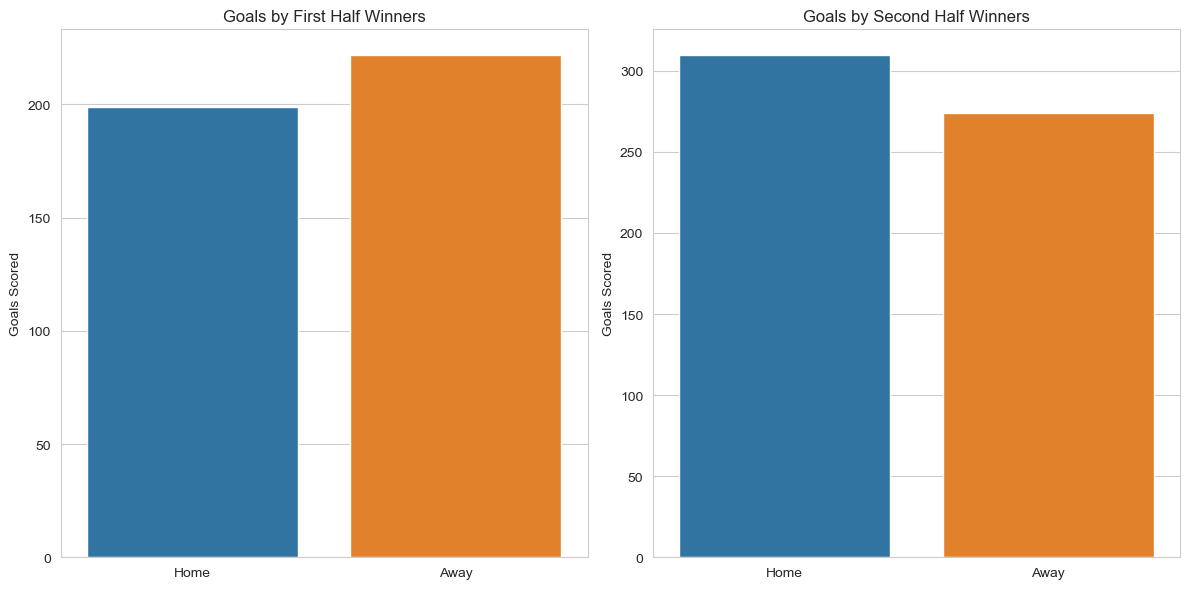

In [96]:
# Calculate second half goals
df['SHHG'] = df['FTHG'] - df['HTHG']  # Second half home goals
df['SHAG'] = df['FTAG'] - df['HTAG']  # Second half away goals

# Determine winners for the first half and second half
df['FirstHalfWinner'] = df.apply(lambda row: 'Home' if row['HTHG'] > row['HTAG'] else 'Away', axis=1)
df['SecondHalfWinner'] = df.apply(lambda row: 'Home' if row['SHHG'] > row['SHAG'] else 'Away', axis=1)

# Prepare data for visualization
first_half_goals = {
    'Home': df.loc[df['FirstHalfWinner'] == 'Home', 'HTHG'].sum(),
    'Away': df.loc[df['FirstHalfWinner'] == 'Away', 'HTAG'].sum()
}

second_half_goals = {
    'Home': df.loc[df['SecondHalfWinner'] == 'Home', 'SHHG'].sum(),
    'Away': df.loc[df['SecondHalfWinner'] == 'Away', 'SHAG'].sum()
}

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# First Half
sns.barplot(x=list(first_half_goals.keys()), y=list(first_half_goals.values()), ax=axs[0])
axs[0].set_title('Goals by First Half Winners')
axs[0].set_ylabel('Goals Scored')

# Second Half
sns.barplot(x=list(second_half_goals.keys()), y=list(second_half_goals.values()), ax=axs[1])
axs[1].set_title('Goals by Second Half Winners')
axs[1].set_ylabel('Goals Scored')

plt.tight_layout()
plt.show()


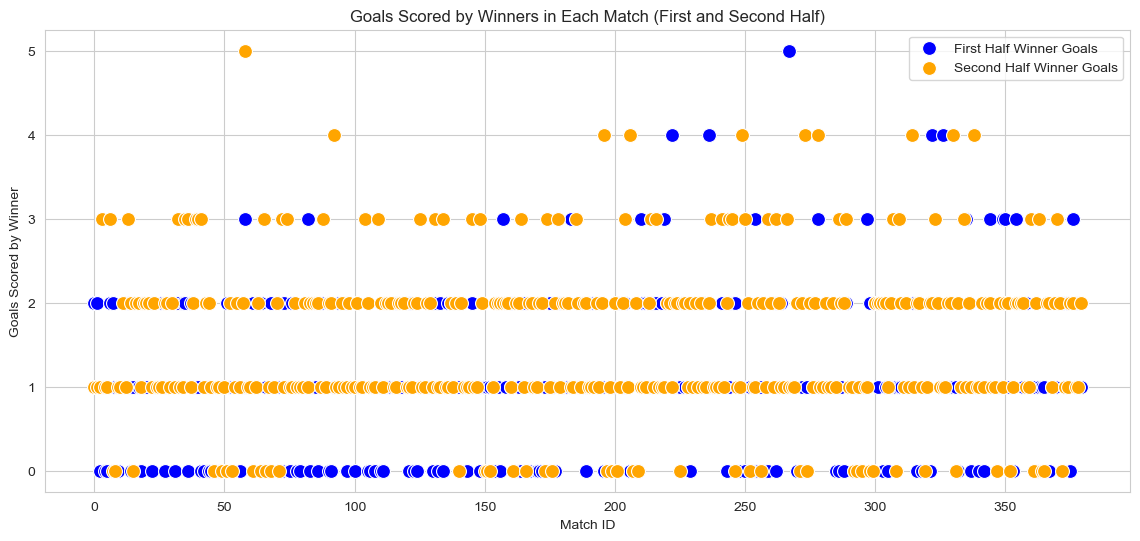

In [51]:
# Calculate second half goals
df['SHHG'] = df['FTHG'] - df['HTHG']  # Second half home goals
df['SHAG'] = df['FTAG'] - df['HTAG']  # Second half away goals

# Determine the goals by winners in both halves
df['FirstHalfWinnerGoals'] = df.apply(lambda row: row['HTHG'] if row['HTHG'] > row['HTAG'] else row['HTAG'], axis=1)
df['SecondHalfWinnerGoals'] = df.apply(lambda row: row['SHHG'] if row['SHHG'] > row['SHAG'] else row['SHAG'], axis=1)

# Create a unique identifier for each match
df['MatchID'] = range(len(df))

# Plotting
plt.figure(figsize=(14, 6))

# First Half Goals by Match
sns.scatterplot(data=df, x='MatchID', y='FirstHalfWinnerGoals', label='First Half Winner Goals', color='blue', s=100)

# Second Half Goals by Match
sns.scatterplot(data=df, x='MatchID', y='SecondHalfWinnerGoals', label='Second Half Winner Goals', color='orange', s=100)

plt.title('Goals Scored by Winners in Each Match (First and Second Half)')
plt.xlabel('Match ID')
plt.ylabel('Goals Scored by Winner')
plt.legend()
plt.show()


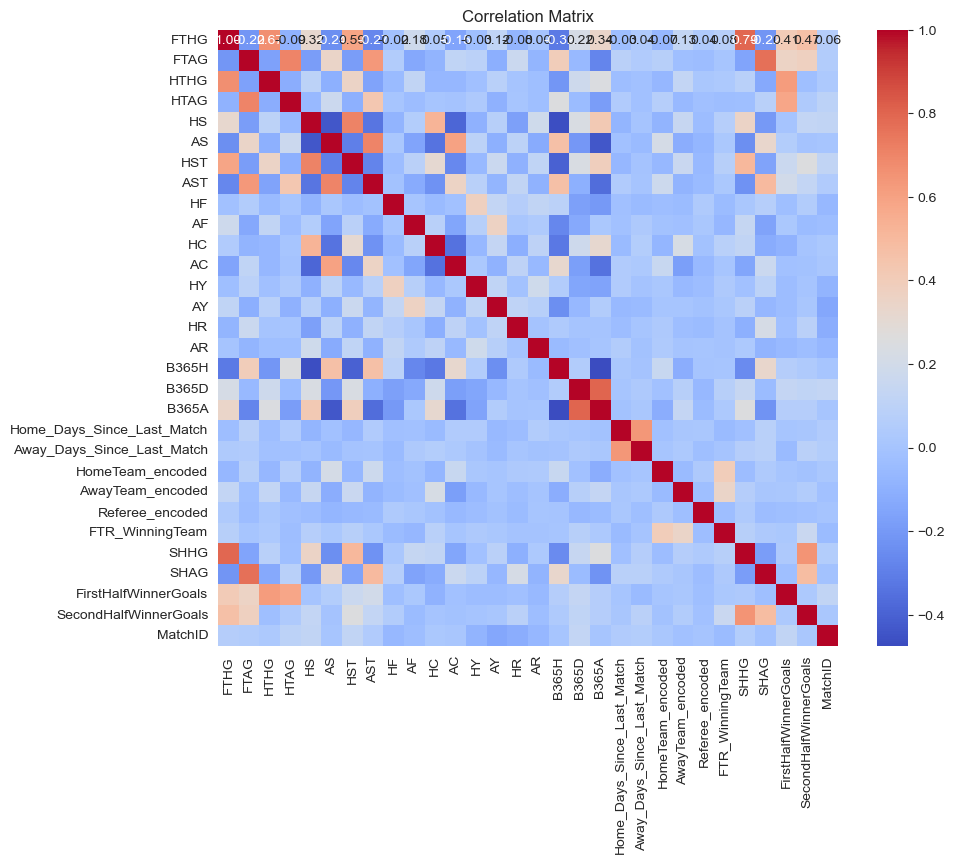

In [53]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [55]:
df

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,...,Away_Days_Since_Last_Match,HomeTeam_encoded,AwayTeam_encoded,Referee_encoded,FTR_WinningTeam,SHHG,SHAG,FirstHalfWinnerGoals,SecondHalfWinnerGoals,MatchID
0,0,3,0,2,6,17,1,8,11,8,...,0,5,12,3,12,0,1,2.0,1.0,0
1,2,1,2,0,15,6,7,2,12,12,...,0,0,15,14,0,0,1,2.0,1.0,1
2,1,1,0,0,14,16,5,3,9,14,...,0,2,18,16,0,1,1,0.0,1.0,2
3,4,1,1,0,27,9,12,3,11,12,...,0,4,11,5,4,3,1,1.0,3.0,3
4,0,1,0,0,19,9,9,2,12,6,...,0,8,9,22,9,0,1,0.0,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,0,2,0,0,17,11,3,4,10,9,...,13,4,13,3,13,0,2,0.0,2.0,375
371,2,4,0,3,10,12,5,7,15,11,...,4,3,14,24,14,2,1,3.0,2.0,376
370,2,1,1,1,26,5,5,2,8,11,...,16,0,8,14,0,1,0,1.0,1.0,377
373,1,2,0,2,20,12,3,6,11,5,...,15,5,15,7,15,1,0,2.0,1.0,378


In [59]:
# Columns to drop
columns_to_drop = ['MatchID']

# Dropping the specified columns
df = df.drop(columns=columns_to_drop)

# Display the resulting DataFrame
print(df.head())


   FTHG  FTAG  HTHG  HTAG  HS  AS  HST  AST  HF  AF  ...  \
0     0     3     0     2   6  17    1    8  11   8  ...   
1     2     1     2     0  15   6    7    2  12  12  ...   
2     1     1     0     0  14  16    5    3   9  14  ...   
3     4     1     1     0  27   9   12    3  11  12  ...   
4     0     1     0     0  19   9    9    2  12   6  ...   

   Home_Days_Since_Last_Match  Away_Days_Since_Last_Match  HomeTeam_encoded  \
0                           0                           0                 5   
1                           0                           0                 0   
2                           0                           0                 2   
3                           0                           0                 4   
4                           0                           0                 8   

   AwayTeam_encoded  Referee_encoded  FTR_WinningTeam  SHHG  SHAG  \
0                12                3               12     0     1   
1                15       

# Scaling the data

In [61]:
from sklearn.preprocessing import StandardScaler

# Assume `data` is your DataFrame
# Separate features and target
X = df.drop(columns='FTR_WinningTeam')
y = df['FTR_WinningTeam']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform features
X_scaled = scaler.fit_transform(X)

# Convert scaled features back to a DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Add the target column back to the scaled features
data_scaled = pd.concat([X_scaled, y.reset_index(drop=True)], axis=1)

# Optionally print the resulting DataFrame
print(data_scaled)


         FTHG      FTAG      HTHG      HTAG        HS        AS       HST  \
0   -1.319824  1.191927 -0.883961  1.670573 -1.503528  0.882414 -1.539688   
1    0.146647 -0.375313  1.523961 -0.761679 -0.064383 -1.132054  0.542452   
2   -0.586588 -0.375313 -0.883961 -0.761679 -0.224288  0.699281 -0.151594   
3    1.613118 -0.375313  0.320000 -0.761679  1.854477 -0.582654  2.277570   
4   -1.319824 -0.375313 -0.883961 -0.761679  0.575237 -0.582654  1.236499   
..        ...       ...       ...       ...       ...       ...       ...   
375 -1.319824  0.408307 -0.883961 -0.761679  0.255427 -0.216387 -0.845641   
376  0.146647  1.975548 -0.883961  2.886699 -0.863908 -0.033253 -0.151594   
377  0.146647 -0.375313  0.320000  0.454447  1.694572 -1.315188 -0.151594   
378 -0.586588  0.408307 -0.883961  1.670573  0.735142 -0.033253 -0.845641   
379 -1.319824  1.191927 -0.883961  0.454447 -1.503528  1.065548 -1.539688   

          AST        HF        AF  ...  Home_Days_Since_Last_Match  \
0    

In [63]:
data_scaled

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,...,Home_Days_Since_Last_Match,Away_Days_Since_Last_Match,HomeTeam_encoded,AwayTeam_encoded,Referee_encoded,SHHG,SHAG,FirstHalfWinnerGoals,SecondHalfWinnerGoals,FTR_WinningTeam
0,-1.319824,1.191927,-0.883961,1.670573,-1.503528,0.882414,-1.539688,1.414263,0.073930,-0.912093,...,-1.849189,-1.813544,-0.780399,0.433555,-1.101080,-1.050214,0.161669,1.009810,-0.568813,12
1,0.146647,-0.375313,1.523961,-0.761679,-0.064383,-1.132054,0.542452,-0.963701,0.363552,0.177829,...,-1.849189,-1.813544,-1.647509,0.953821,0.111704,-1.050214,0.161669,1.009810,-0.568813,0
2,-0.586588,-0.375313,-0.883961,-0.761679,-0.224288,0.699281,-0.151594,-0.567374,-0.505314,0.722790,...,-1.849189,-1.813544,-1.300665,1.474087,0.332210,-0.064828,0.161669,-1.254071,-0.568813,0
3,1.613118,-0.375313,0.320000,-0.761679,1.854477,-0.582654,2.277570,-0.567374,0.073930,0.177829,...,-1.849189,-1.813544,-0.953821,0.260133,-0.880574,1.905943,0.161669,-0.122130,1.550293,4
4,-1.319824,-0.375313,-0.883961,-0.761679,0.575237,-0.582654,1.236499,-0.963701,0.363552,-1.457054,...,-1.849189,-1.813544,-0.260133,-0.086711,0.993729,-1.050214,0.161669,-1.254071,-0.568813,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,-1.319824,0.408307,-0.883961,-0.761679,0.255427,-0.216387,-0.845641,-0.171047,-0.215692,-0.639612,...,-1.334396,-0.167896,-0.953821,0.606977,-1.101080,-1.050214,1.258708,-1.254071,0.490740,13
376,0.146647,1.975548,-0.883961,2.886699,-0.863908,-0.033253,-0.151594,1.017935,1.232417,-0.094651,...,0.081283,-1.307191,-1.127243,0.780399,1.214235,0.920558,0.161669,2.141750,0.490740,14
377,0.146647,-0.375313,0.320000,0.454447,1.694572,-1.315188,-0.151594,-0.963701,-0.794936,-0.094651,...,0.081283,0.211869,-1.647509,-0.260133,0.111704,-0.064828,-0.935370,-0.122130,-0.568813,0
378,-0.586588,0.408307,-0.883961,1.670573,0.735142,-0.033253,-0.845641,0.621608,0.073930,-1.729534,...,0.081283,0.085281,-0.780399,0.953821,-0.660068,-0.064828,-0.935370,1.009810,-0.568813,15


# RF

Accuracy: 0.4123
Precision: 0.3223
Recall: 0.4123
F1-Score: 0.3151

Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.91      0.54        34
           1       0.33      0.20      0.25         5
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         3
           9       1.00      0.17      0.29         6
          10       0.30      0.50      0.37         6
          11       0.00      0.00      0.00         2
          12       0.80      0.67      0.73        12
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         6
          15       0.00      0.00      0.00 

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_clas

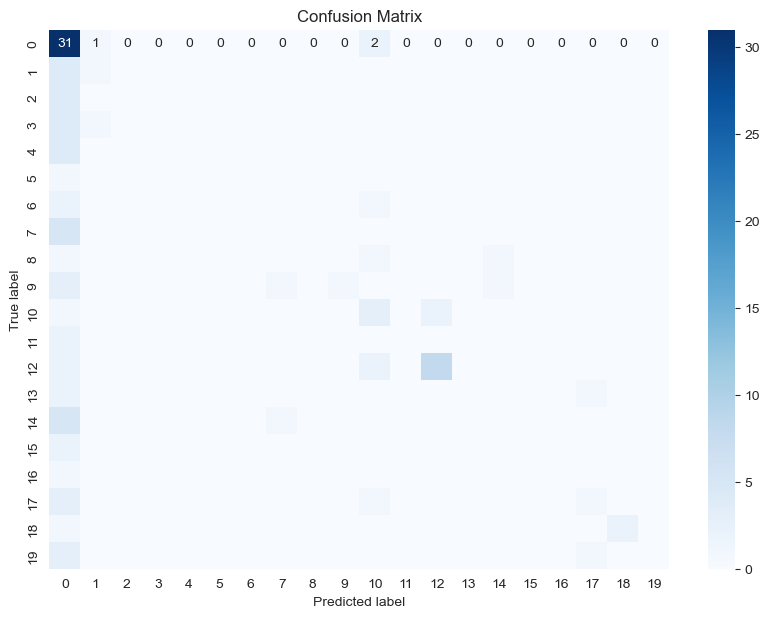

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume 'data_scaled' is your preprocessed DataFrame and 'FTR_WinningTeam' is your target column
# Features (X) and target (y)
X = data_scaled.drop(columns=['FTR_WinningTeam'])
y = data_scaled['FTR_WinningTeam']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest classifier
rf = RandomForestClassifier(criterion='gini', n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate Precision, Recall, and F1-Score with weighted average
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print Precision, Recall, and F1-Score
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Print the classification report for more details
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()


# SVM

Accuracy: 0.2193
Precision: 0.2253
Recall: 0.2193
F1-Score: 0.2118

Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.47      0.42        34
           1       0.00      0.00      0.00         5
           2       0.25      0.25      0.25         4
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         6
          10       0.10      0.17      0.12         6
          11       0.00      0.00      0.00         2
          12       0.83      0.42      0.56        12
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         6
          15       0.00      0.00      0.00 

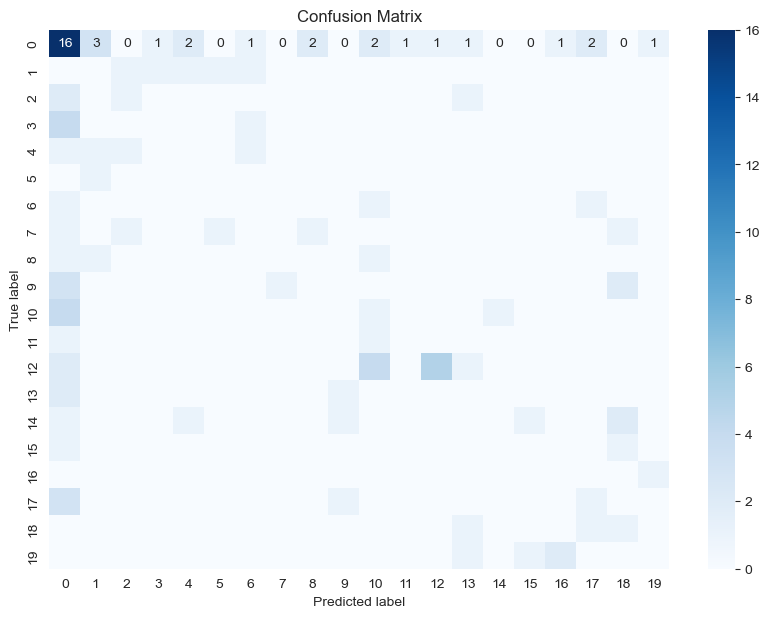

In [67]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume 'data_scaled' is your preprocessed DataFrame and 'FTR_WinningTeam' is your target column
# Features (X) and target (y)
X = data_scaled.drop(columns=['FTR_WinningTeam'])
y = data_scaled['FTR_WinningTeam']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the SVM classifier
svm = SVC(kernel='linear', random_state=42)

# Train the model
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate Precision, Recall, and F1-Score with weighted average
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print Precision, Recall, and F1-Score
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Print the classification report for more details
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

# RF with oversampling

Accuracy: 0.4123
Precision: 0.3588
Recall: 0.4123
F1-Score: 0.3249

Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.91      0.54        34
           1       0.50      0.20      0.29         5
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         3
           9       0.50      0.17      0.25         6
          10       0.22      0.33      0.27         6
          11       0.00      0.00      0.00         2
          12       0.70      0.58      0.64        12
          13       0.50      0.67      0.57         3
          14       0.50      0.17      0.25         6
          15       0.00      0.00      0.00 

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_clas

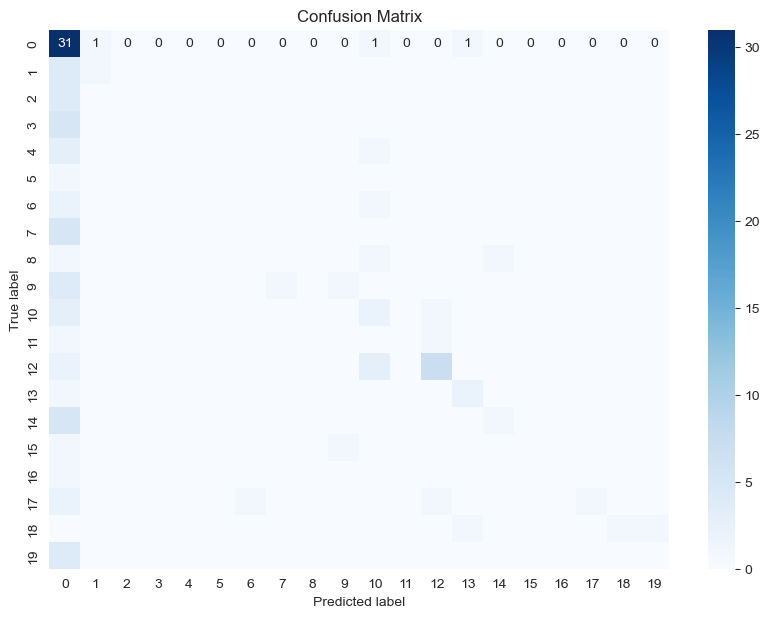

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume 'data_scaled' is your preprocessed DataFrame and 'FTR_WinningTeam' is your target column
# Features (X) and target (y)
X = data_scaled.drop(columns=['FTR_WinningTeam'])
y = data_scaled['FTR_WinningTeam']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply Random Oversampling to the training data
ros = RandomOverSampler(sampling_strategy='minority',random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Initialize the Random Forest classifier
rf = RandomForestClassifier(criterion='gini', n_estimators=100, random_state=42)

# Train the model on the resampled data
rf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate Precision, Recall, and F1-Score with weighted average
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print Precision, Recall, and F1-Score
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Print the classification report for more details
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()


# GradientBoostingClassifier

Accuracy: 0.4298
Precision: 0.4504
Recall: 0.4298
F1-Score: 0.3902

Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.71      0.51        34
           1       0.50      0.20      0.29         5
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         5
           4       0.67      0.50      0.57         4
           5       0.00      0.00      0.00         1
           6       0.50      0.33      0.40         3
           7       0.00      0.00      0.00         5
           8       0.67      0.67      0.67         3
           9       1.00      0.17      0.29         6
          10       0.33      0.67      0.44         6
          11       0.00      0.00      0.00         2
          12       0.75      0.50      0.60        12
          13       0.60      1.00      0.75         3
          14       0.50      0.17      0.25         6
          15       0.00      0.00      0.00 

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_clas

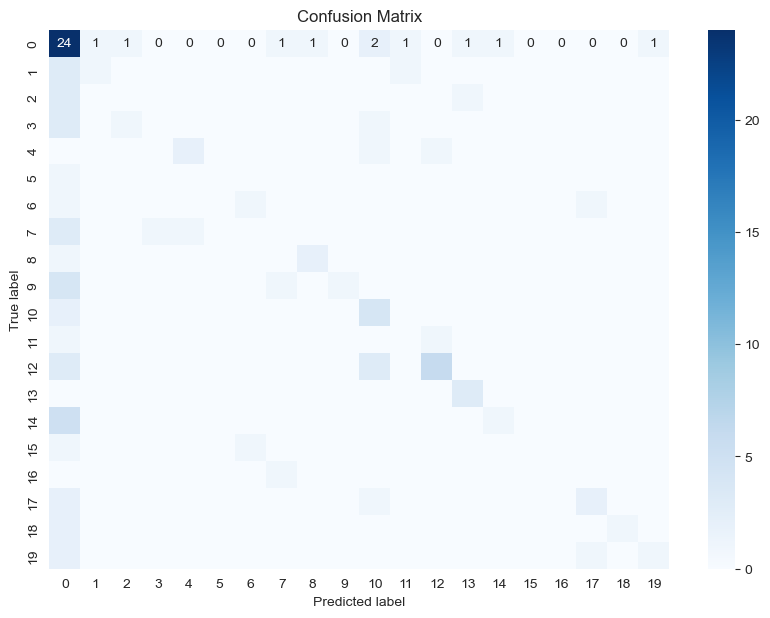

In [71]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume 'data_scaled' is your preprocessed DataFrame and 'FTR_WinningTeam' is your target column
# Features (X) and target (y)
X = data_scaled.drop(columns=['FTR_WinningTeam'])
y = data_scaled['FTR_WinningTeam']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply Random Oversampling to the training data
ros = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Initialize the Gradient Boosting classifier
gbc = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model on the resampled data
gbc.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = gbc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate Precision, Recall, and F1-Score with weighted average
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print Precision, Recall, and F1-Score
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Print the classification report for more details
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

# LGBMClassifier

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000380 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 515
[LightGBM] [Info] Number of data points in the train set: 413, number of used features: 28
[LightGBM] [Info] Start training from score -1.501659
[LightGBM] [Info] Start training from score -3.250859
[LightGBM] [Info] Start training from score -3.538541
[LightGBM] [Info] Start training from score -3.944006
[LightGBM] [Info] Start training from score -3.720862
[LightGBM] [Info] Start training from score -4.637153
[LightGBM] [Info] Start training from score -3.190234
[LightGBM] [Info] Start training from score -3.720862
[LightGBM] [Info] Start training from score -3.538541
[LightGBM] [Info] Start training from score -3.720862
[LightGBM] [Info] Start training from score -2.932405
[LightGBM] [Info] Start training from score -4.414010
[LightGBM] [Info] Start training from score -2.978925
[LightGBM] [

INFO:__main__:Accuracy: 0.5263
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
INFO:__main__:Precision: 0.5363
INFO:__main__:Recall: 0.5263
INFO:__main__:F1-Score: 0.4924
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavio

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

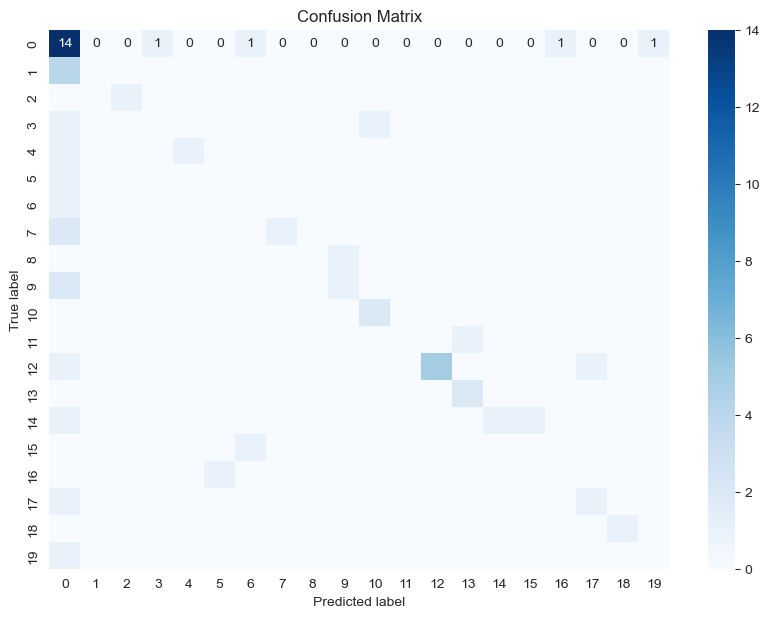

Precision: 0.5363
Recall: 0.5263
F1-Score: 0.4924

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.78      0.58        18
           1       0.00      0.00      0.00         4
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         2
           4       1.00      0.50      0.67         2
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       1.00      0.33      0.50         3
           8       0.00      0.00      0.00         1
           9       0.50      0.33      0.40         3
          10       0.67      1.00      0.80         2
          11       0.00      0.00      0.00         1
          12       1.00      0.71      0.83         7
          13       0.67      1.00      0.80         2
          14       1.00      0.33      0.50         3
          15       0.00      0.00      0.00         1
       

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
import logging
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configure logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Assume 'data_scaled' is your preprocessed DataFrame and 'FTR_WinningTeam' is your target column
# Features (X) and target (y)
X = data_scaled.drop(columns=['FTR_WinningTeam'])
y = data_scaled['FTR_WinningTeam']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Apply Random Oversampling to the training data
ros = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Initialize the LightGBM classifier
lgbm = LGBMClassifier(n_estimators=50, random_state=42)

# Train the model on the resampled data
lgbm.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = lgbm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
logger.info(f"Accuracy: {accuracy:.4f}")

# Calculate Precision, Recall, and F1-Score with weighted average
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Log Precision, Recall, and F1-Score
logger.info(f"Precision: {precision:.4f}")
logger.info(f"Recall: {recall:.4f}")
logger.info(f"F1-Score: {f1:.4f}")

# Log the classification report for more details
classification_details = classification_report(y_test, y_pred, output_dict=False)
logger.info("\nClassification Report:")
logger.info("\n" + classification_details)

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()
# Print Precision, Recall, and F1-Score
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Print the classification report for more details
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


# Logistic Regression

Accuracy: 0.2281
Precision: 0.2042
Recall: 0.2281
F1-Score: 0.2065

Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.53      0.44        34
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         6
          10       0.00      0.00      0.00         6
          11       0.00      0.00      0.00         2
          12       0.71      0.42      0.53        12
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         6
          15       0.00      0.00      0.00 

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_clas

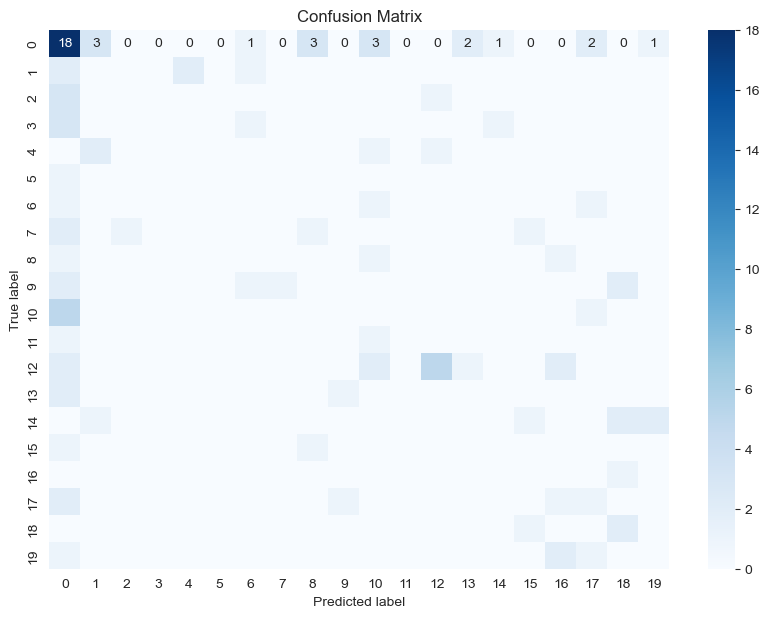

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assume 'data_scaled' is your preprocessed DataFrame and 'FTR_WinningTeam' is your target column
# Features (X) and target (y)
X = data_scaled.drop(columns=['FTR_WinningTeam'])
y = data_scaled['FTR_WinningTeam']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply Random Oversampling to the training data
ros = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the resampled data
log_reg.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate Precision, Recall, and F1-Score with weighted average
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print Precision, Recall, and F1-Score
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Print the classification report for more details
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()
